# S09 T02: Aprendizaje Supervisado - Regresiones
___
**Descripción**
Vamos a practicar y familiarizarnos con regresiones
___
**Objetivos**
- Modelos de regresión
- Árboles de regresión
- Random Forest
- Redes Neuronales
- Otros modelos

In [1]:
#load libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

Definicion de funciones:

In [37]:
def validation_model(model, prediction):
    print('R Square (R2):', model.score(X_test, y_test))
    print('Mean Squared Error (MSE):', mean_squared_error(y_test ,prediction))
    print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_test ,prediction)))
    print('Mean Absolute Error (MAE):', mean_absolute_error(y_test ,prediction))


In [57]:
def validation_model2(model, prediction): #for internal validation
    print('R Square (R2):', model.score(X, y))
    print('Mean Squared Error (MSE):', mean_squared_error(y ,prediction))
    print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y ,prediction)))
    print('Mean Absolute Error (MAE):', mean_absolute_error(y ,prediction))

In [107]:
def validation_model3(model, prediction):
    print('R Square (R2):', model.score(X2_test, y1_test))
    print('Mean Squared Error (MSE):', mean_squared_error(y1_test ,prediction))
    print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y1_test ,prediction)))
    print('Mean Absolute Error (MAE):', mean_absolute_error(y1_test ,prediction))


Primeros pasos:
- 1. Cargar base de datos

In [2]:
#import te dataset 
data = pd.read_csv('DelayedFlights.csv')

- 2. Overview de la base de datos


In [3]:
data.shape

(1936758, 30)

In [4]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.0,3.341651e+06,2.066065e+06,0.0,1517452.5,3242558.0,4972466.75,7009727.0
Year,1936758.0,2.008000e+03,0.000000e+00,2008.0,2008.0,2008.0,2008.00,2008.0
Month,1936758.0,6.111106e+00,3.482546e+00,1.0,3.0,6.0,9.00,12.0
DayofMonth,1936758.0,1.575347e+01,8.776272e+00,1.0,8.0,16.0,23.00,31.0
DayOfWeek,1936758.0,3.984827e+00,1.995966e+00,1.0,2.0,4.0,6.00,7.0
DepTime,1936758.0,1.518534e+03,4.504853e+02,1.0,1203.0,1545.0,1900.00,2400.0
CRSDepTime,1936758.0,1.467473e+03,4.247668e+02,0.0,1135.0,1510.0,1815.00,2359.0
ArrTime,1929648.0,1.610141e+03,5.481781e+02,1.0,1316.0,1715.0,2030.00,2400.0
CRSArrTime,1936758.0,1.634225e+03,4.646347e+02,0.0,1325.0,1705.0,2014.00,2400.0
FlightNum,1936758.0,2.184263e+03,1.944702e+03,1.0,610.0,1543.0,3422.00,9742.0


- 3. Limpieza de datos

In [7]:
round(data[:].isnull().sum() * 100 / data.shape[0], 2)

Unnamed: 0            0.00
Year                  0.00
Month                 0.00
DayofMonth            0.00
DayOfWeek             0.00
DepTime               0.00
CRSDepTime            0.00
ArrTime               0.37
CRSArrTime            0.00
UniqueCarrier         0.00
FlightNum             0.00
TailNum               0.00
ActualElapsedTime     0.43
CRSElapsedTime        0.01
AirTime               0.43
ArrDelay              0.43
DepDelay              0.00
Origin                0.00
Dest                  0.00
Distance              0.00
TaxiIn                0.37
TaxiOut               0.02
Cancelled             0.00
CancellationCode      0.00
Diverted              0.00
CarrierDelay         35.59
WeatherDelay         35.59
NASDelay             35.59
SecurityDelay        35.59
LateAircraftDelay    35.59
dtype: float64

In [3]:
#remove unimportant columns
data = data.drop(['Unnamed: 0','TailNum','TaxiIn','TaxiOut','CancellationCode'], axis = 1)

In [4]:
#drop columns with higher missing values
data.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], inplace=True)

Asumimos que los datos faltantes, son producto de la cancelacion o desviacion del vuelo, por lo que eliminamos los valores Nan y las columnas 'Cancelled' y 'Diverted'

In [5]:
# count of Diverted and cancelled variables
print(data['Cancelled'].value_counts(), '\n', data['Diverted'].value_counts())

0    1936125
1        633
Name: Cancelled, dtype: int64 
 0    1929004
1       7754
Name: Diverted, dtype: int64


In [6]:
# Drop NaNs
data.dropna(inplace=True)
data.drop(['Cancelled','Diverted'], axis = 1, inplace= True)

Modificacion del dtype de las variables:

In [7]:
#data type object to categoric variables
data[['UniqueCarrier','Origin','Dest']] = data[['UniqueCarrier','Origin','Dest']].astype('category')

In [8]:
#data columns to datetime
data.rename(index=str,columns={'DayofMonth':'Day'},inplace=True)
data['Date'] = pd.to_datetime(data[['Year','Month','Day']])
#remove columns used
data = data.drop(['Year','Month','Day'], axis = 1)

In [9]:
#data float to int
data[["ActualElapsedTime","CRSElapsedTime","AirTime",'ArrDelay','DepDelay','CRSDepTime','DepTime','CRSArrTime','ArrTime']] = data[["ActualElapsedTime","CRSElapsedTime","AirTime",'ArrDelay','DepDelay','CRSDepTime','DepTime','CRSArrTime','ArrTime']].astype('int64')

In [10]:
data.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Date
0,4,2003,1955,2211,2225,WN,335,128,150,116,-14,8,IAD,TPA,810,2008-01-03
1,4,754,735,1002,1000,WN,3231,128,145,113,2,19,IAD,TPA,810,2008-01-03
2,4,628,620,804,750,WN,448,96,90,76,14,8,IND,BWI,515,2008-01-03
3,4,1829,1755,1959,1925,WN,3920,90,90,77,34,34,IND,BWI,515,2008-01-03
4,4,1940,1915,2121,2110,WN,378,101,115,87,11,25,IND,JAX,688,2008-01-03


In [11]:
# Save dataset for future tasks
data.to_csv('df_clean_dbdelay.csv')

### DataExploration
Antes de iniciar con los modelos de regresion, se genera un heatmap con la correlacion de las variables, para observar la relacion entre la variable dependiente 'ArrDelay' y las variables independientes.

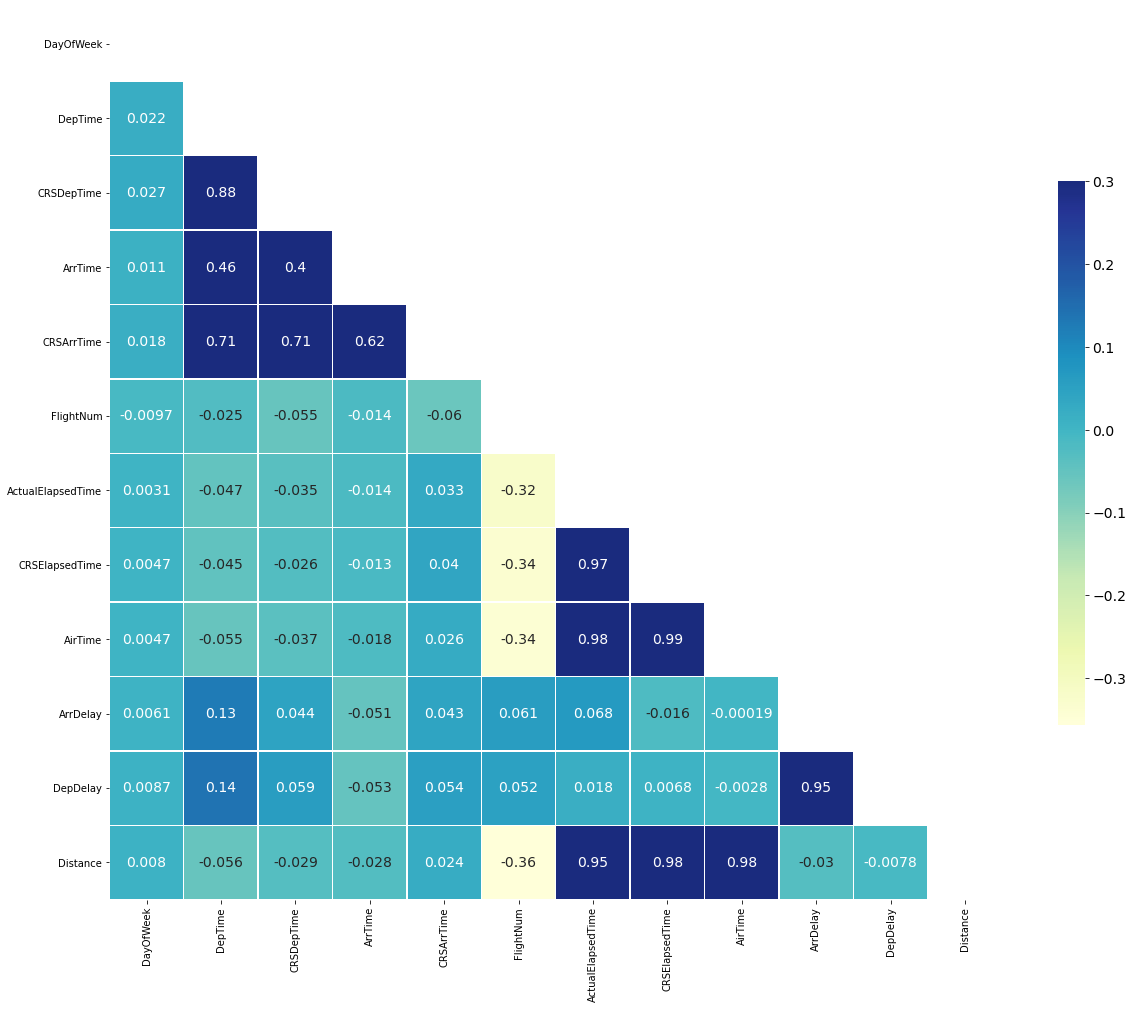

In [11]:
f, ax = plt.subplots(figsize=(20, 20))
#mask for removing the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.rcParams['font.size'] = '14'
sns.heatmap(data.corr(), annot=True, mask=mask, cmap="YlGnBu",vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Ahora observamos la distribucion de la variable objetivo 'ArrDelay', donde se observa que esta skewed a la derecha y podemos ver la presencia de outliers. 

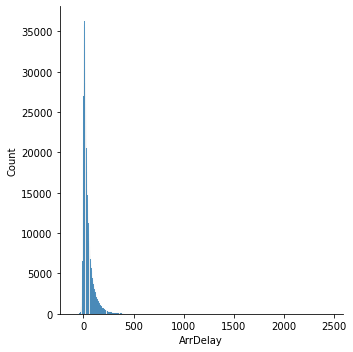

In [13]:
sns.displot(data['ArrDelay'], x=data['ArrDelay'])

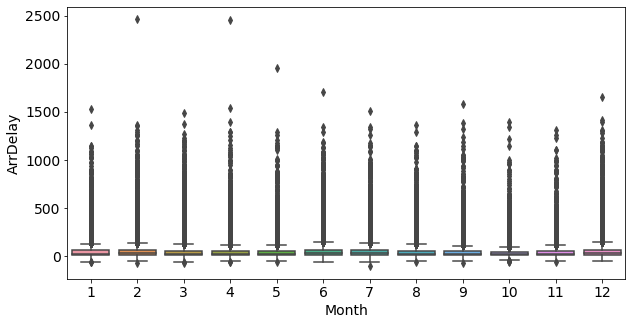

In [17]:
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(x=data['Month'], y=data['ArrDelay'], data=data)

Observamos las 10 aerolineas con mayor ArrDelay

In [36]:
data[['UniqueCarrier','ArrDelay']].sort_values(by='ArrDelay',ascending=False).head(10)

,UniqueCarrier,ArrDelay
322516,NW,2461
686014,NW,2453
839306,NW,1951
1009553,MQ,1707
1881639,NW,1655
1497823,NW,1583
685437,NW,1542
163379,AA,1525
1214839,NW,1510
521096,NW,1490


## Nivel 1

### - Ejercicio 1
Crea al menos tres modelos de regresión distintos para intentar predecir lo mejor posible el retraso de los vuelos (ArrDelay) de DelayedFlights.csv.
<br>

* Variable dependiente: ***Arrival delay***


https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial
https://realpython.com/linear-regression-in-python/
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
https://machinelearningmastery.com/feature-selection-for-regression-data/

Al tener casi dos millones de datos, se hace un muestreo aleatorio simple para poder optimizar los tiempos de calculo del notebook.
<br>

El sampling por calculo nos dice que una muestra valida puede ser de 400 datos, pero para abarcar un expectro mayor de datos, se ha decidido usar una muestra de mil datos

In [12]:
#Simple Random Sampling
srs_sampling = data.sample(1000)
srs_sampling

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Date
643557,6,1636,1630,1841,1812,US,1733,125,102,79,29,6,PHL,CLT,448,2008-04-12
984166,1,831,825,947,945,WN,1510,76,80,60,2,6,SFO,LAX,337,2008-06-02
1693259,6,836,830,949,949,FL,807,73,79,52,0,6,BWI,BOS,370,2008-11-15
983833,1,1527,1505,2302,2315,WN,381,275,310,259,-13,22,LAS,PVD,2363,2008-06-02
1887102,3,1256,1245,1452,1441,NW,1571,116,116,84,11,11,CLT,DTW,500,2008-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323760,2,1033,1025,1210,1153,NW,1136,97,88,71,17,8,DTW,BWI,408,2008-02-19
1003351,6,1626,1325,1911,1618,FL,656,105,113,91,173,181,MDW,ATL,590,2008-06-21
1834453,2,1013,1000,1133,1110,WN,2479,80,70,60,23,13,CMH,BWI,336,2008-12-02
225751,5,2027,1840,2156,2018,XE,2423,149,158,128,98,107,SDF,IAH,788,2008-02-22


In [13]:
srs_sampling.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,1000.0,3.957,1.992265,1.0,2.00,4.0,6.00,7.0
DepTime,1000.0,1494.220,436.787524,3.0,1148.00,1522.5,1840.00,2354.0
CRSDepTime,1000.0,1438.891,413.779887,40.0,1120.00,1451.5,1750.00,2345.0
ArrTime,1000.0,1620.255,517.265465,5.0,1329.75,1709.5,2024.00,2400.0
CRSArrTime,1000.0,1621.236,449.335911,1.0,1319.00,1651.0,2000.00,2359.0
FlightNum,1000.0,2169.020,1965.667629,3.0,580.75,1498.0,3527.25,7790.0
ActualElapsedTime,1000.0,134.555,72.185412,29.0,80.00,119.5,167.00,524.0
CRSElapsedTime,1000.0,135.345,70.736240,24.0,80.00,120.0,169.00,524.0
AirTime,1000.0,109.102,68.273794,12.0,57.00,92.0,139.00,498.0
ArrDelay,1000.0,41.659,55.641466,-26.0,8.00,23.0,53.00,498.0


In [14]:
#calcute mean and compare with the oridinal data and the sample
mean_data = round(data['ArrDelay'].mean(),2)
mean_sample = round(srs_sampling['ArrDelay'].mean(),2)
print('la media de ArrDelay del dataset original es:',mean_data, 'y la media de ArrDelay del dataset muestra es:',mean_sample)

la media de ArrDelay del dataset original es: 42.2 y la media de ArrDelay del dataset muestra es: 41.66


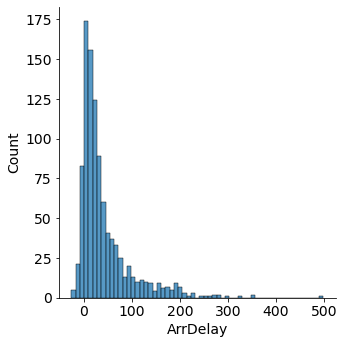

In [15]:
sns.displot(srs_sampling['ArrDelay'], x=srs_sampling['ArrDelay'])

### Deteccion de multicolinealidad en las variables
La multicolinealidad aparece cuando dos o mas variables independientes tienen una alta correlacion entre ellas, por lo que dificultaran observar su impacto individual en la variable independiente. Por lo tanto, se hace un analisis de *Variance Inflation Factor(VIF)* para detectarla. 
<br>
*un VIF mayor a 5 indica alta multicolinealidad*

<br>

*https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/*

In [16]:
# VIF
# Select only numerical variables
Z = srs_sampling.select_dtypes(include = ['int64'])

def vif(Z):
    vif_data = pd.DataFrame() # Empty data frame
    vif_data['feature'] = Z.columns # Include the columns name into dataframe
    vif_data['Variance Inflation Factor(VIF)'] = [variance_inflation_factor(Z.values, i) for i in range(len(Z.columns))]
    return vif_data

In [17]:
vif(Z)

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,Variance Inflation Factor(VIF)
0,DayOfWeek,4.243629
1,DepTime,87.580764
2,CRSDepTime,98.062881
3,ArrTime,20.956241
4,CRSArrTime,45.100730
5,FlightNum,2.435442
6,ActualElapsedTime,inf
7,CRSElapsedTime,inf
8,AirTime,202.027685
9,ArrDelay,inf


Se puede observar que las variables con mayor VIF son DepTime, CRSDepTime, CrsArrTime, AirTime y Distance. Pero no se eliminaran todas ellas pues algunas pudieran ser de interes en el analisis, como Distance y AirTime.

In [18]:
srs_sampling.drop(columns=["ActualElapsedTime","CRSElapsedTime",'FlightNum','CRSDepTime','CRSArrTime'], inplace=True)

### Feature engineering
Para trabajar los modelos de machine learning es necesario que pueda interpretar los datos de manera correcta, por lo que se van a normalizar las variables categoricas. En este dataset las variables categoricas de interes son 'UniqueCarrier', 'Dest' y 'Origin', pero debido a que la lista de observaciones diferentes es muy amplia podriamos terminar con un dataset de mas de 600 features, por lo que se va a utilizar *target encoder* para no aumentar el tamaño del dataset y faciliar su procesamiento.

*https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64*


In [19]:
encoder = TargetEncoder()
encoder_1=ce.TargetEncoder(cols='Origin') 
srs_sampling['Origin']=encoder_1.fit_transform(data['Origin'],data['ArrDelay'])

encoder_2=ce.TargetEncoder(cols='Dest') 
srs_sampling['Dest']=encoder_2.fit_transform(data['Dest'],data['ArrDelay'])

srs_sampling['UniqueCarrier'] = encoder.fit_transform(srs_sampling['UniqueCarrier'], srs_sampling['ArrDelay'])
srs_sampling

C:\Users\Usuario\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Usuario\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Usuario\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Date
643557,6,1636,1841,31.275000,79,29,6,46.079601,40.118728,448,2008-04-12
984166,1,831,947,28.947090,60,2,6,45.900493,36.752268,337,2008-06-02
1693259,6,836,949,43.625000,52,0,6,36.570742,48.904260,370,2008-11-15
983833,1,1527,2302,28.947090,259,-13,22,32.946354,37.310623,2363,2008-06-02
1887102,3,1256,1452,31.958333,84,11,11,40.839591,45.507969,500,2008-12-31
...,...,...,...,...,...,...,...,...,...,...,...
323760,2,1033,1210,31.958333,71,17,8,43.576496,35.889979,408,2008-02-19
1003351,6,1626,1911,43.625000,91,173,181,35.483431,47.898827,590,2008-06-21
1834453,2,1013,1133,28.947090,60,23,13,48.146131,35.889979,336,2008-12-02
225751,5,2027,2156,37.093023,128,98,107,52.187077,44.426757,788,2008-02-22


### Train test dataset
Dividimos el dataset en training y test para probar los modelos, con una relacion de 80-20% y Se divide el dataset en los predictores (X) y la variable target (Y)

In [20]:
#data/predictors   
X = srs_sampling.drop(['ArrDelay','Date'], axis=1)
#target variable
y = srs_sampling['ArrDelay']

In [21]:
#split test-train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# shape of the train and test
print(X_train.shape, '\n', X_test.shape, '\n', y_train.shape, '\n', y_test.shape)

(800, 9) 
 (200, 9) 
 (800,) 
 (200,)


## Primer modelo: Multiple linear regression

Primero se hace fitting del model en el training data y despues se intenta predecir en el test data.

In [24]:
#train model
model_mlr = LinearRegression().fit(X_train, y_train)
mlr = pd.DataFrame({'Intercept': model_mlr.intercept_, 'Coefficients': model_mlr.coef_,})
mlr

,Intercept,Coefficients
0,-7.841182,-0.369493
1,-7.841182,0.001927
2,-7.841182,-0.002714
3,-7.841182,0.068676
4,-7.841182,0.493347
5,-7.841182,1.019052
6,-7.841182,-0.147618
7,-7.841182,0.086544
8,-7.841182,-0.058259


In [111]:
# make prediction of the model in test set
prediction_mlr = model_mlr.predict(X_test)
predic_acc_mlr = pd.DataFrame({'Original Values': y_test, 'Predicted Values': prediction_mlr})
predic_acc_mlr.head(5)

,Original Values,Predicted Values
1379468,95,67.601030
561615,154,153.477341
946324,-2,8.343861
258264,219,231.462408
441157,14,16.126162


Antes de mostrar el sumario estadistico del modelo, agregamos un termino constante para los coeficientes.

In [54]:
# print the stats of the model
X_add_Constant = sm.add_constant(X_test) #add constant
model_mlr_stats = sm.OLS(y_test, X_add_Constant).fit()
model_mlr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     321.0
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          7.60e-110
Time:                        15:32:17   Log-Likelihood:                -805.03
No. Observations:                 200   AIC:                             1630.
Df Residuals:                     190   BIC:                             1663.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.6838      9.263     -1.153      0.250     -28.955       7.587
DayOfWeek        -0.6395      0.500     -1.279      0.202      -1.625       0.346
DepTime          -0.0008      0.003     -0.311      0.756      -0.006       0.004
ArrTime          -0.0009      0.002     -0.398      0.691      -0.005       0.004
UniqueCarrier    -0.0259      0.104     -0.248      0.805      -0.232       0.180
AirTime           0.5733      0.068      8.429      0.000       0.439       0.707
DepDelay          1.0166      0.020     50.723      0.000       0.977       1.056
Origin           -0.0557      0.146     -0.380      0.704      -0.345       0.233
Dest              0.2867      0.130      2.209      0.028       0.031       0.543
Distance         -0.0736      0.008     -8.889      0.000      -0.090      -0.057
==============================================================================
Omnibus:                      103.386   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              995.050
Skew:                           1.717   Prob(JB):                    8.47e-217
Kurtosis:                      13.374   Cond. No.                     2.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretacion de la tabla
- Primero se observa la informacion referente a la variable dependiente (target) y el modelo y metodo, en este caso OLS significa Ordinary Least Squares y el metodo Least Squares, los cuales intentan realizar una linea de regresion que minimize la distancia cuadrada de la linea de regresion. **Se observa que el R cuadrado del modelo explica un 93.8% de la varianza de la variable dependiente**
- Los coeficientes de las variables independientes muestran que cada que la variable dependiente aumenta 1, la variable independiente aumenta o disminuye de acuerdo al valor.
- R-cuadrado: el porcentaje de varianza que explica el modelo 
- Error estándar (es la desviación estándar de la distribución muestral de una estadística, más comúnmente de la media)
- Puntuaciones t y los valores p, para la prueba de hipótesis

Evaluacion del modelo de regresion

In [30]:
print(round(mean_absolute_error(y_test, prediction_mlr),2))

9.67


### Segundo modelo: Neural Network Regression

In [32]:
model_mlp = MLPRegressor(hidden_layer_sizes=(len(X_train.columns),len(X_train.columns),len(X_train.columns)), activation='relu', solver='adam', max_iter=500).fit(X_train,y_train)
                          
predict_train = model_mlp.predict(X_train)
predict_test = model_mlp.predict(X_test)
                          
prediction_accuracy_NN = pd.DataFrame({'Current Values': y_test, 'Predicted Values': predict_test})
prediction_accuracy_NN.head(5)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Current Values,Predicted Values
1379468,95,58.491649
561615,154,142.075641
946324,-2,3.942254
258264,219,243.642135
441157,14,14.489939


### Tercer modelo: Decision Tree Regression

In [34]:
#train model
model_dtr = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

In [35]:
#prediction on test dataset
pred_dtr = model_dtr.predict(X_test)
prediction_dtr = pd.DataFrame({'Current Values': y_test, 'Predicted Values': pred_dtr})
prediction_dtr.head(5)

,Current Values,Predicted Values
1379468,95,68.0
561615,154,134.0
946324,-2,-9.0
258264,219,226.0
441157,14,14.0


### - Ejercicio 2
Compárales en base al MSE y al R2.
<br>
*https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b*


In [38]:
# Multiple Linear Regression Model 
print('Multiple Linear Regression Model:\n')
print(validation_model(model_mlr, prediction_mlr),'\n')

# Neuronal Netwok Model
print('Neuronal Network Model:\n')
print(validation_model(model_mlp, predict_test),'\n')

# Decision Tree Regression Model
print('Decision Tree Regression Model:\n')
print(validation_model(model_dtr, pred_dtr),'\n')



Multiple Linear Regression Model:

R Square (R2): 0.9326346240776864
Mean Squared Error (MSE): 200.3532238149284
Root Mean Squared Error (RMSE): 14.154618462358087
Mean Absolute Error (MAE): 9.670025051509915
None 

Neuronal Network Model:

R Square (R2): 0.8884096768416435
Mean Squared Error (MSE): 331.8838599981871
Root Mean Squared Error (RMSE): 18.21767987418231
Mean Absolute Error (MAE): 13.105664446612082
None 

Decision Tree Regression Model:

R Square (R2): 0.8177448741607455
Mean Squared Error (MSE): 542.05
Root Mean Squared Error (RMSE): 23.281967270830012
Mean Absolute Error (MAE): 16.95
None 



La evaluacion de los modelos nos ayuda a entender el rendimiento del modelo y que tan cerca esta la prediccion con respecto al valor real.
- R Square: Mide cuanta variabilidad de la variable dependiente que puede ser explicada por el modelo, en este caso se observa que el modelo que explica menos es el Decision Tree Regression con solo 81.7%, mientras que el que se desempeña mejor es Multiple linear regression con 93.2%
- Mean square error: es la suma del cuadrado de los errores, es una medida absoluta del 'goodness' del ajuste. Se observa que el model con menor MSE es multiple linear regression.
- Root mean square error: es la raiz cuadrada del MSE. Donde multiple linear regression tiene menor value.
- Mean absolute error: es la suma del valor absoluto del error. Se observa que el modelo con menor MAE es multiple linear regression.

<br>
Se puede decir que el modelo que predice mejor en este caso es Multiple linear regression, pues tiene un mayor R2 y menor MSE/RMSE/MAE.


### - Ejercicio 3
Entrena utilizando los diferentes parámetros que admiten.
___
### Multiple linear regression:
Este modelo permite los siguientes parametros de acuerdo a la documentacion:
>class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

>- **fit_interceptbool**, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

>- **normalizebool**, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

>- **copy_Xbool**, default=True
If True, X will be copied; else, it may be overwritten.

>- **n_jobsint**, default=None
The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

>- **positivebool**, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.


In [44]:
model_mlr2 = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1,positive='True').fit(X_train, y_train)

In [45]:
# make prediction for the new model in test set
prediction_mlr2 = model_mlr2.predict(X_test)
predic_acc_mlr2 = pd.DataFrame({'Values Values': y_test, 'Predicted Values': prediction_mlr2})
predic_acc_mlr2.head(5)

,Values Values,Predicted Values
1379468,95,69.610927
561615,154,144.266124
946324,-2,7.061978
258264,219,231.027569
441157,14,15.132810


In [46]:
# Multiple Linear Regression Model 
print('Multiple Linear Regression Model:\n')
print(validation_model(model_mlr, prediction_mlr2),'\n')

Multiple Linear Regression Model:

R Square (R2): 0.9326346240776864
Mean Squared Error (MSE): 269.0943025512418
Root Mean Squared Error (RMSE): 16.404094078956078
Mean Absolute Error (MAE): 11.475605715808284
None 



Se puede observar que al establecer el 'intercept' y 'normalize' como 'False' los valores obtenidos en los errores aumentan para MSE/MAE/RMSE, con respecto al modelo sin parametros definidios.

### Neural Network Regression
Este modelo permite los siguientes parametros de acuerdo a la documentacion:
>class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

Para el analisis, se va a modificar el tipo de 'solver' utilizado, lo que condiciona que tipo de parametros se pueden añadir, en este caso cambiaremos de 'adam' a 'lbfgs', que de acuerdo con la documentacion tiene buen performance.

>**activation**{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
Activation function for the hidden layer. 
‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

>**solver**{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’. The solver for weight optimization.
‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
‘sgd’ refers to stochastic gradient descent.
‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

>**max_funint**, default=15000
Only used when solver=’lbfgs’. Maximum number of function calls. The solver iterates until convergence (determined by ‘tol’), number of iterations reaches max_iter, or this number of function calls. Note that number of function calls will be greater than or equal to the number of iterations for the MLPRegressor.

In [47]:
model_mlp2 = MLPRegressor(hidden_layer_sizes=(len(X_train.columns),len(X_train.columns),len(X_train.columns)), activation='relu', solver='lbfgs', max_iter=500,max_fun=1000).fit(X_train,y_train)
                          
predict_train2 = model_mlp2.predict(X_train)
predict_test2 = model_mlp2.predict(X_test)
                          
prediction_accuracy_NN2 = pd.DataFrame({'Current Values': y_test, 'Predicted Values': predict_test2})
prediction_accuracy_NN2.head(5)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Current Values,Predicted Values
1379468,95,69.142847
561615,154,155.255777
946324,-2,9.658919
258264,219,234.594425
441157,14,18.154611


In [48]:
# Neuronal Netwok Model
print('Neuronal Network Model:\n')
print(validation_model(model_mlp2, predict_test2),'\n')

Neuronal Network Model:

R Square (R2): 0.9330127043413772
Mean Squared Error (MSE): 199.22876486767046
Root Mean Squared Error (RMSE): 14.11484200647214
Mean Absolute Error (MAE): 9.720361732674313
None 



Se puede observar que el modelo con los parametros ajustados tiene un desempeño mas eficiente que el primer modelo creado, pues la R2 aumenta a 93% y MSE/RMSE disminuyen, al igual que MAE.

### Decision Tree Regression Model

Este modelo permite los siguientes parametros de acuerdo a la documentacion:
>class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

Este modelo tambien admite diversos parametros, pero se han enfocado los cambios en aquellos que parecen ser de mayor relevancia:

>**criterion**{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.

>**splitter**{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

>**random_state** int, RandomState instance or None, default=None
Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer

In [51]:
#train model
model_dtr2 = DecisionTreeRegressor(criterion='friedman_mse',splitter='best',random_state=None).fit(X_train,y_train)

#prediction on test dataset
pred_dtr2 = model_dtr2.predict(X_test)
prediction_dtr2 = pd.DataFrame({'Current Values': y_test, 'Predicted Values': pred_dtr2})
prediction_dtr2.head(5)

,Current Values,Predicted Values
1379468,95,66.0
561615,154,134.0
946324,-2,-9.0
258264,219,226.0
441157,14,13.0


In [52]:
# Decision Tree Regression Model
print('Decision Tree Regression Model:\n')
print(validation_model(model_dtr2, pred_dtr2),'\n')

Decision Tree Regression Model:

R Square (R2): 0.8010391349718822
Mean Squared Error (MSE): 591.735
Root Mean Squared Error (RMSE): 24.325603795178445
Mean Absolute Error (MAE): 17.605
None 



Se puede observar que el modelo disminuye su rendimiento al cambiar los parametros utilizados, con respecto al modelo inicial.

### - Ejercicio 4
Compara su rendimiento utilizando la aproximación training/test o utilizando todos los datos (validación interna):
<br>

Anteriormente se habia dividido el dataset en train/test, por lo que ahora se va a realizar una validacion interna de los modelos.

### Multiple linear regression:

In [53]:
#aplication of the model
model_mlr_all = LinearRegression().fit(X, y)

#predictions
prediction_mlr_all = model_mlr_all.predict(X)
predic_acc_mlr_all = pd.DataFrame({'Values Values': y, 'Predicted Values': prediction_mlr_all})
predic_acc_mlr_all.head(5)

,Values Values,Predicted Values
643557,29,6.445902
984166,2,6.145636
1693259,0,1.610552
983833,-13,-0.847602
1887102,11,13.990094


In [59]:
# Multiple Linear Regression Model 
print('Multiple Linear Regression Model:\n')
print(validation_model2(model_mlr_all, prediction_mlr_all),'\n')

Multiple Linear Regression Model:

R Square (R2): 0.9290405730899387
Mean Squared Error (MSE): 219.46875948371078
Root Mean Squared Error (RMSE): 14.814478036154727
Mean Absolute Error (MAE): 9.997960137288072
None 



### Neural Network Regression

In [61]:
model_mlp_all = MLPRegressor(hidden_layer_sizes=(len(X.columns),len(X.columns),len(X.columns)), activation='relu', solver='adam', max_iter=500).fit(X,y)
                          
predict_all = model_mlp_all.predict(X)
                          
prediction_accuracy_NN_all = pd.DataFrame({'Current Values': y, 'Predicted Values': predict_all})
prediction_accuracy_NN_all.head(5)

,Current Values,Predicted Values
643557,29,11.894217
984166,2,10.224881
1693259,0,-0.505415
983833,-13,11.807297
1887102,11,15.758516


In [62]:
# Multiple Linear Regression Model 
print('Neural Network Regression:\n')
print(validation_model2(model_mlp_all, predict_all),'\n')

Neural Network Regression:

R Square (R2): 0.9009681296408307
Mean Squared Error (MSE): 306.2933662729009
Root Mean Squared Error (RMSE): 17.50123899250853
Mean Absolute Error (MAE): 11.465117251434105
None 



### Decision Tree Regression Model

In [63]:
#train model
model_dtr_all = DecisionTreeRegressor(random_state=0).fit(X,y)

#prediction on test dataset
pred_dtr_all = model_dtr_all.predict(X)
prediction_dtr_all = pd.DataFrame({'Current Values': y, 'Predicted Values': pred_dtr_all})
prediction_dtr_all.head(5)


,Current Values,Predicted Values
643557,29,29.0
984166,2,2.0
1693259,0,0.0
983833,-13,-13.0
1887102,11,11.0


In [66]:
# Multiple Linear Regression Model 
print('Decision Tree Regression Model:\n')
print(validation_model2(model_dtr_all, pred_dtr_all),'\n')

Decision Tree Regression Model:

R Square (R2): 1.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
None 



Se observa que al hacer la validacion interna del modelo se obtienen resultados con 100% de r2 y cero errores. Esto se puede deber a que el modelo este haciendo 'overfitting' o a que esta siendo entrenado y utilizado en el mismo conjunto de datos.

## Nivel 2

### - Ejercicio 5
Realiza algún proceso de ingeniería de variables para mejorar su predicción
<br>

Anteriormente, se habia realizado feature engineering al normalizar las variables categoricas para el analisis. Ahora, se va a aplicar el metodo de normalizacion de atributos "Standard scaling".

In [73]:
#copy of dataset
std_sc_data=srs_sampling.copy()
std_sc_data = std_sc_data.drop(['Date'], axis=1)


#apply the standarization to features
sc_data = pd.DataFrame(StandardScaler().fit_transform(std_sc_data))
sc_data = pd.DataFrame(std_sc_data, columns= std_sc_data.columns)

#separate target and predictors

#data/predictors   
X1 = sc_data.drop(['ArrDelay'], axis=1)
#target variable
y1 = sc_data['ArrDelay']

In [84]:
#split test-train
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

### Multiple linear regression:

In [85]:
#train model
model_mlr_std = LinearRegression().fit(X1_train, y1_train)
mlr_std = pd.DataFrame({'Intercept': model_mlr_std.intercept_, 'Coefficients': model_mlr_std.coef_,})
mlr_std

,Intercept,Coefficients
0,-5.903964,-0.351898
1,-5.903964,0.000303
2,-5.903964,-0.002016
3,-5.903964,0.073401
4,-5.903964,0.517742
5,-5.903964,1.033622
6,-5.903964,-0.202523
7,-5.903964,0.141731
8,-5.903964,-0.063548


In [86]:
# make prediction of the model in test set
prediction_mlr_std = model_mlr_std.predict(X1_test)
predic_acc_mlr_std = pd.DataFrame({'Values Values': y1_test, 'Predicted Values': prediction_mlr_std})
predic_acc_mlr_std.head(5)

,Values Values,Predicted Values
1087041,27,27.660144
312719,498,524.240171
293417,-2,2.207065
1674969,22,-4.019130
1151103,25,17.382602


In [87]:
# Multiple Linear Regression Model 
print('Multiple Linear Regression Model:\n')
print(validation_model(model_mlr_std, prediction_mlr_std),'\n')

Multiple Linear Regression Model:

R Square (R2): 0.9353681831128706
Mean Squared Error (MSE): 8108.570146561949
Root Mean Squared Error (RMSE): 90.04759933813865
Mean Absolute Error (MAE): 56.11027539346689
None 



### Neural Network Regression

In [88]:
model_mlp_std = MLPRegressor(hidden_layer_sizes=(len(X1_train.columns),len(X1_train.columns),len(X1_train.columns)), activation='relu', solver='adam', max_iter=500).fit(X1_train,y1_train)
                          
predict_train_std = model_mlp.predict(X1_train)
predict_test_std = model_mlp.predict(X1_test)
                          
prediction_accuracy_NN = pd.DataFrame({'Current Values': y1_test, 'Predicted Values': predict_test_std})
prediction_accuracy_NN.head(5)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Current Values,Predicted Values
1087041,27,16.838605
312719,498,485.752067
293417,-2,6.959193
1674969,22,5.355363
1151103,25,18.048557


In [90]:
# Multiple Linear Regression Model 
print('Neural Network Regression:\n')
print(validation_model(model_mlp_std, predict_test_std),'\n')

Neural Network Regression:

R Square (R2): 0.9212059861829026
Mean Squared Error (MSE): 7786.837480147295
Root Mean Squared Error (RMSE): 88.24305910465307
Mean Absolute Error (MAE): 54.2495967258058
None 



### Decision Tree Regression Model

In [91]:
#train model
model_dtr_std = DecisionTreeRegressor(random_state=0).fit(X1_train,y1_train)
#prediction on test dataset
pred_dtr_std = model_dtr_std.predict(X1_test)
prediction_dtr_std = pd.DataFrame({'Current Values': y1_test, 'Predicted Values': pred_dtr_std})
prediction_dtr_std.head(5)


,Current Values,Predicted Values
1087041,27,3.0
312719,498,352.0
293417,-2,1.0
1674969,22,28.0
1151103,25,9.0


In [92]:
# Multiple Linear Regression Model 
print('Decision Tree Regression Model:\n')
print(validation_model(model_dtr_std, pred_dtr_std),'\n')

Decision Tree Regression Model:

R Square (R2): 0.9773816025916305
Mean Squared Error (MSE): 7554.99
Root Mean Squared Error (RMSE): 86.91944546532726
Mean Absolute Error (MAE): 55.55
None 



## Nivel 3


### - Ejercicio 6
No utilices la variable DepDelay a la hora de hacer predicciones

In [93]:
#remove depdelay
X2=X1.drop(['DepDelay'], axis=1)

In [95]:
#split test-train
X2_train, X2_test, y1_train, y1_test = train_test_split(X2, y1, test_size=0.2)

### Multiple linear regression:¶

In [96]:
#train model
model_mlr3 = LinearRegression().fit(X2_train, y1_train)
mlr3 = pd.DataFrame({'Intercept': model_mlr3.intercept_, 'Coefficients': model_mlr3.coef_,})
mlr3

,Intercept,Coefficients
0,-51.612654,-0.788769
1,-51.612654,0.024757
2,-51.612654,-0.010832
3,-51.612654,0.579138
4,-51.612654,0.549396
5,-51.612654,0.117494
6,-51.612654,0.875885
7,-51.612654,-0.063529


In [99]:
# make prediction of the model in test set
prediction_mlr3 = model_mlr3.predict(X2_test)
predic_acc_mlr3 = pd.DataFrame({'Values Values': y1_test, 'Predicted Values': prediction_mlr3})
predic_acc_mlr3.head(5)

,Values Values,Predicted Values
835828,23,41.540489
81723,9,32.782808
1014209,46,42.840256
1183799,25,30.178031
1719255,-4,8.642742


### Neural Network Regression

In [102]:
model_mlp3 = MLPRegressor(hidden_layer_sizes=(len(X2_train.columns),len(X2_train.columns),len(X2_train.columns)), activation='relu', solver='adam', max_iter=500).fit(X2_train,y1_train)
                          
predict_test_3 = model_mlp3.predict(X2_test)
                          
prediction_accuracy_NN3 = pd.DataFrame({'Current Values': y1_test, 'Predicted Values': predict_test_3})
prediction_accuracy_NN3.head(5)

,Current Values,Predicted Values
835828,23,33.087134
81723,9,36.888393
1014209,46,47.658133
1183799,25,37.717269
1719255,-4,26.140751


### Decision Tree Regression Model

In [103]:
#train model
model_dtr3 = DecisionTreeRegressor(random_state=0).fit(X2_train,y1_train)
#prediction on test dataset
pred_dtr3= model_dtr3.predict(X2_test)
prediction_dtr3 = pd.DataFrame({'Current Values': y1_test, 'Predicted Values': pred_dtr3})
prediction_dtr3.head(5)

,Current Values,Predicted Values
835828,23,39.0
81723,9,3.0
1014209,46,-4.0
1183799,25,83.0
1719255,-4,-2.0


### Validation of methods

In [108]:
# Multiple Linear Regression Model 
print('Multiple Linear Regression Model:\n')
print(validation_model3(model_mlr3, prediction_mlr3),'\n')

# Neuronal Netwok Model
print('Neuronal Network Model:\n')
print(validation_model3(model_mlp3, predict_test_3),'\n')

# Decision Tree Regression Model
print('Decision Tree Regression Model:\n')
print(validation_model3(model_dtr3, pred_dtr3),'\n')

Multiple Linear Regression Model:

R Square (R2): 0.16362323099921117
Mean Squared Error (MSE): 2109.4231517818093
Root Mean Squared Error (RMSE): 45.92845688439586
Mean Absolute Error (MAE): 32.84707878890838
None 

Neuronal Network Model:

R Square (R2): 0.036059055563478215
Mean Squared Error (MSE): 2431.1523472538056
Root Mean Squared Error (RMSE): 49.306717060191765
Mean Absolute Error (MAE): 34.35956422222007
None 

Decision Tree Regression Model:

R Square (R2): -1.0803503862376576
Mean Squared Error (MSE): 5246.845
Root Mean Squared Error (RMSE): 72.43510889064777
Mean Absolute Error (MAE): 46.435
None 



Se observa que al remover la variable DepDelay las predicciones del modelo tiene mayor error y menor % de r2, por lo que el modelo se vuelve ineficiente. Se puede decir que la variable DepDelay es importante para la prediccion del ArrDelay.